In [1]:
%load_ext load_style
%load_style talk.css

# Process U-Wind: Mean and Std

In this notebook, we will do a little complicated operations
* read 4D u-Wind data
* calculate mean and stadard deviation along the axis of time
* visualize based on the library of **basemap**

**Data**

wind data can be downlaed from https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.html

This u-wind is a 4D data, includding [months|levels|lat|lon]. The presure levels in hPa. 

Moreover, the wind data with **scaling** and **offset**. when using them, have to restore them to oringal values.

## 1. Load basic libs

In [2]:
% matplotlib inline

from pylab import *
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # plot on map projections

from netCDF4 import Dataset as netcdf # netcdf4-python module

## 2. Read u-wind data and pick variables

### 2.1 Use print to check variable information.

Actually, you can also use numdump infile.nc -h to check the same inforamtion

In [3]:
ncset = netcdf(r'data/uwnd3.mon.mean.nc')
print(ncset)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: monthly mean u wind from the NCEP Reanalysis
    history: Mon Jul  5 22:36:33 1999: ncrcat uwnd.mon.mean.nc /Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/uwnd.mon.mean.nc
Made bt Cathy Smith 12/5/95 
(netCDF2.3)
    description: Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces
    platform: Model
    Conventions: COARDS
    dimensions(sizes): lon(144), lat(73), level(17), time(692)
    variables(dimensions): float32 level(level), float32 lat(lat), float32 lon(lon), float64 time(time), int16 uwnd(time,level,lat,lon)
    groups: 



###  2.2 Read data

Have to set_auto_mask(False) to automatically scaling and offseting, or may cause problem.

In [4]:
ncset.set_auto_mask(False)

lon = ncset['lon'][:]  
lat = ncset['lat'][:] 
lev = ncset['level'][:]    
u   = ncset['uwnd'][504:624,:]   # for the period 1990-1999.

print(u.shape)

(120L, 17L, 73L, 144L)


In [5]:
print(lev)

[ 1000.   925.   850.   700.   600.   500.   400.   300.   250.   200.
   150.   100.    70.    50.    30.    20.    10.]


### 2.3  Have a quick shot on first grid

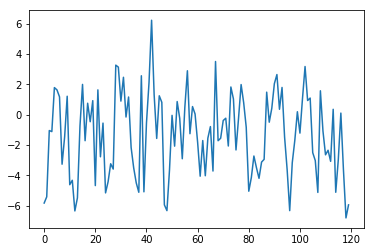

In [6]:
plot(u[:,1,0, 0])

## 3. Calculate Mean and STD in time

### 3.1 Mean

In [7]:
u_10y = np.mean(u, axis=0) # calculate mean for all years and months
u_10y.shape

(17L, 73L, 144L)

### 3.2  STD

In [8]:
u_10y_std=np.std(u, axis=0)
u_10y.shape

(17L, 73L, 144L)

### 3.3 Visualize Mean and STD at 1000hPa (the first level)

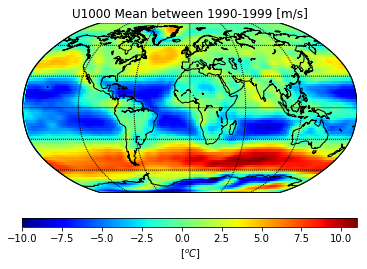

In [9]:
[lons, lats] = meshgrid(lon,lat)

m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')

minu = floor(np.min(u_10y[0]))
maxu = ceil(np.max(u_10y[0]))

h = m.pcolormesh(lons, lats, u_10y[0], shading='flat',latlon=True, cmap='jet', vmin=minu, vmax=maxu)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')


plt.title('U1000 Mean between 1990-1999 [m/s]')

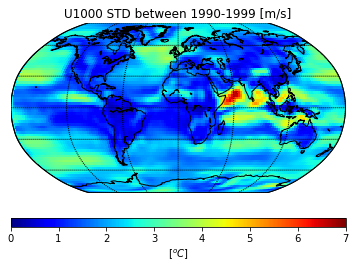

In [10]:
[lons, lats] = meshgrid(lon,lat)

m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')

minu = floor(np.min(u_10y_std[0]))
maxu = ceil(np.max(u_10y_std[0]))

h = m.pcolormesh(lons, lats, u_10y_std[0], shading='flat',latlon=True, cmap='jet', vmin=minu, vmax=maxu)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

plt.title('U1000 STD between 1990-1999 [m/s]')

## References

http://unidata.github.io/netcdf4-python/

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Kalnay et al.,The NCEP/NCAR 40-year reanalysis project, Bull. Amer. Meteor. Soc., 77, 437-470, 1996.